In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
df=pd.read_csv('11-iris.csv')

In [9]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df=df.drop('Id',axis=1)#this column is unrequired

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.duplicated().sum()

np.int64(3)

In [13]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
df.describe()#an excellent dataset for machine-learning

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# <font color='blue'>Visualization</font>

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

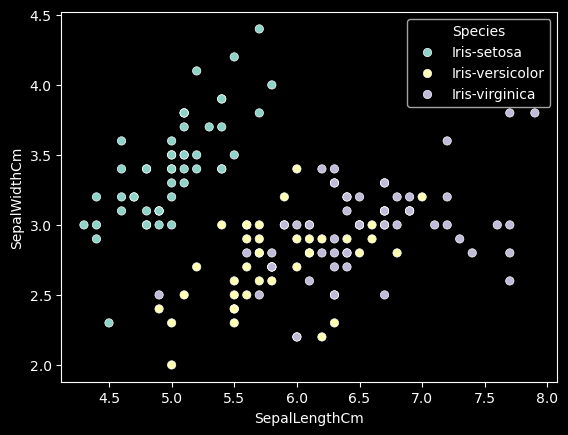

In [15]:
sns.scatterplot(data=df,x='SepalLengthCm',y='SepalWidthCm',hue='Species')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

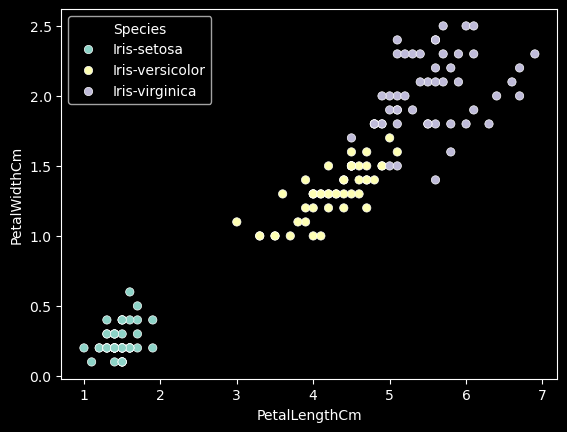

In [16]:
sns.scatterplot(data=df,x='PetalLengthCm',y='PetalWidthCm',hue='Species')

<Figure size 1200x500 with 0 Axes>

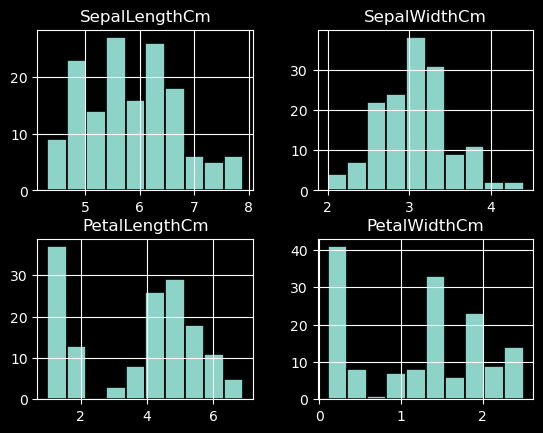

In [17]:
plt.figure(figsize=(12,5))
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()

<Axes: >

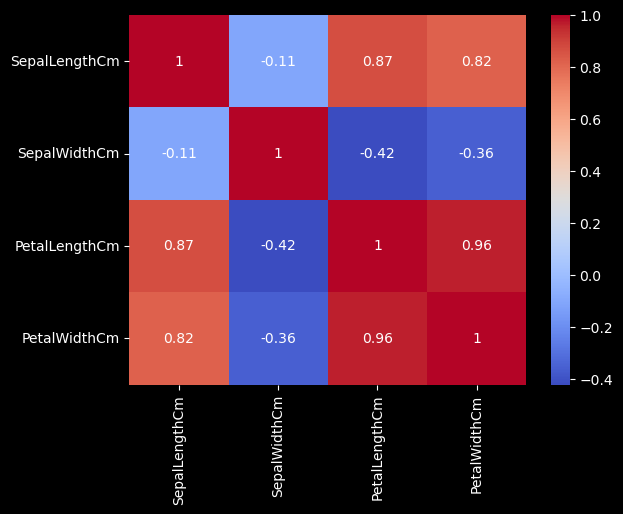

In [18]:
sns.heatmap(df.drop('Species',axis=1).corr(),cmap='coolwarm',annot=True) # we can see an wonderful relationship between at the petal width and length

# <font color='green'>Preprocessing</font>

In [19]:
X=df.drop('Species',axis=1)
y=df['Species']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8,random_state=15)

In [21]:
label_encoder=LabelEncoder()
y_train=label_encoder.fit_transform(y_train)
y_test=label_encoder.transform(y_test)

# <font color='red'>Naive Bayes Model Fitting and Test</font>

In [22]:
model1=Pipeline(steps=[
    ('scaler',StandardScaler()),    
    ('model',LogisticRegression())]
    )

In [23]:
model1.fit(X_train,y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [24]:
y_pred=model1.predict(X_test)

In [25]:
score=accuracy_score(y_pred,y_test)
print('score:',score)
print(classification_report(y_pred,y_test))
print('confusion_matrix: \n',confusion_matrix(y_pred,y_test))


score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion_matrix: 
 [[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]


In [26]:
#model proba
model_probabilty=model1.predict_proba(X_test)

In [27]:
model_probabilty

array([[9.89339931e-01, 1.06597507e-02, 3.18043684e-07],
       [3.95244300e-02, 7.98583775e-01, 1.61891795e-01],
       [3.30704567e-02, 8.67622914e-01, 9.93066291e-02],
       [9.58486258e-01, 4.15124578e-02, 1.28374262e-06],
       [9.37856442e-01, 6.21409363e-02, 2.62206751e-06],
       [3.24711713e-02, 8.33195058e-01, 1.34333771e-01],
       [1.96639241e-05, 1.26127761e-02, 9.87367560e-01],
       [1.80062044e-01, 8.08788839e-01, 1.11491173e-02],
       [9.20430392e-02, 7.99138886e-01, 1.08818074e-01],
       [6.45626758e-04, 1.77847872e-01, 8.21506501e-01],
       [2.27748730e-03, 3.61892042e-01, 6.35830471e-01],
       [2.02862437e-02, 8.90982742e-01, 8.87310144e-02],
       [1.36805029e-02, 9.01188285e-01, 8.51312117e-02],
       [4.23196977e-02, 9.31654533e-01, 2.60257697e-02],
       [2.66961510e-04, 4.85525008e-02, 9.51180538e-01],
       [9.18543767e-01, 8.14536412e-02, 2.59145687e-06],
       [8.93939738e-02, 8.59077694e-01, 5.15283321e-02],
       [3.69012276e-05, 8.94808

In [28]:
model_auc=roc_auc_score(y_test,model_probabilty,multi_class='ovr')

In [29]:
model_auc# in this dataset features is very good so auc is 1 like this situations auc and roc is unrequired 

1.0

# <font color='red'>Logistic Regression</font>

In [30]:
model2=Pipeline(
    steps=[
        ('scaler',StandardScaler()),
        ('model',LogisticRegression())
    ]
)

In [31]:
model2.fit(X_train,y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [32]:
y_pred2=model2.predict(X_test)

In [33]:
score=accuracy_score(y_pred2,y_test)
print('score:',score)
print(classification_report(y_pred2,y_test))
print('confusion_matrix: \n',confusion_matrix(y_pred2,y_test))
#Excellent, we dont need to see auc-roc score because this dataset prefect

score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion_matrix: 
 [[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]


# <font color='red'>Support Vector Classifier</font>


In [34]:
model3=Pipeline(
    steps=[
        ('scaler',StandardScaler()),
        ('model',SVC())
    ]
)

In [35]:
model3.fit(X_train,y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [36]:
y_pred3=model3.predict(X_test)

In [37]:
score=accuracy_score(y_pred3,y_test)
print('score:',score)
print(classification_report(y_pred3,y_test))
print('confusion_matrix: \n',confusion_matrix(y_pred3,y_test))

score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion_matrix: 
 [[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]
